In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
from library.classifiers import *
from library.splitter_df import split

In [2]:
df = sns.load_dataset("iris")

encoder = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
decoder = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species'] = df['species'].map(encoder)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train, X_test, y_train, y_test = split(df, 'species')

In [4]:
BC = Bayes_Classifier()
BC.fit(X_train, y_train, 'cccc', 'u')
BC_pred = BC.evaluate(X_test)
BC_acc = accuracy(BC_pred, y_test)

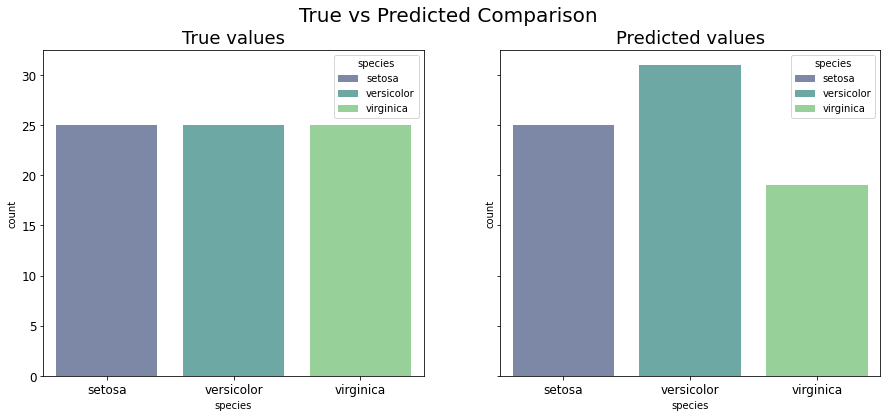

In [5]:
visualize(y_test, BC_pred, 'species', decoder)

In [6]:
NBC = NB_classifier()
NBC.fit(X_train, y_train, 'c', 'o')
NBC_pred = NBC.evaluate(X_test)
NBC_acc = accuracy(NBC_pred, y_test)

In [7]:
GNB = Gaussian_NB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
GNB_acc = accuracy(GNB_pred, y_test)

In [8]:
print(f'Bayes classifier accuracy is {BC_acc}')
print(f'Naive Bayes classifier accuracy is {NBC_acc}')
print(f'Gaussian Naive Bayes classifier accuracy is {GNB_acc:.2f}')

Bayes classifier accuracy is 0.92
Naive Bayes classifier accuracy is 0.96
Gaussian Naive Bayes classifier accuracy is 0.93
